# Air Drag on Falling Cones



Avg Times: 
[6.536 6.49  5.996 5.488 4.834 4.216 3.454]
STD DEV: 1.0864376537612288
C_d uncertainty:  0.00825532053679546
GRADIENT: 0.00015348877435878924
C_d: 0.6348021373376376
Delta A (uncertainties) [8.58509142e-06 2.45151280e-07]


Text(0, 0.5, 'Mass (kg)')

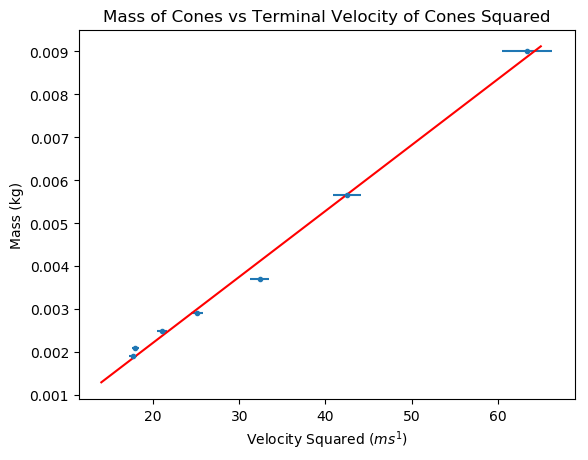

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt("conesfinal.csv", delimiter=",")

def model(p,x):
    return p[0] + p[1]*x

distance = 27.5
distance_sigma = 2/100 ## Don't know this value either

# Align with actual data columns

m = np.array(data[:,0])
m_unc = 0.00001
m_sigma = np.full(len(data[:,0]), m_unc)
TRIALS = 5
t1 = np.array(data[:,1])
t2 = np.array(data[:,2])
t3 = np.array(data[:,3])
t4 = np.array(data[:,4])
t5 = np.array(data[:,5])

t = (t1+t2+t3+t4+t5)/TRIALS
print("Avg Times: ")
print(t)
v = distance/t
vs = v**2

t_sigma = 0.4/5
print("STD DEV: "+str(np.std(t)))
vs_sigma = np.sqrt((distance**2/t**4)*distance_sigma**2+(4*distance**4/t**6)*t_sigma**2)


x = vs
y = m
sigma_x = vs_sigma
sigma_y = m_sigma


bf = np.zeros((2,len(data)))
bf[0,:] = x**0
bf[1,:] = x

A = np.zeros((2,2))
b = np.zeros(2)
for k in range(2):
    for j in range(2):
        A[k,j] = np.sum(bf[k,:]*bf[j,:]/sigma_y**2) 
    b[k] = np.sum(y*bf[k,:]/sigma_y**2)
              
A_inv = np.linalg.inv(A)
a = np.linalg.solve(A,b)

xx = np.linspace(14,65,1000) # Change

## VARS for coefficient

phi = 2.206
g = 9.81
p = 1.225
r = 0.1
A = ((r**2)*(phi**2))/(4*np.pi)

###
grad = a[1]

A_sigma = 4.998*10**(-5)

grad_sigma = np.sqrt(np.diag(A_inv))[1]
C_d_sigma = np.sqrt((((2*g)/(A*p))**2)*grad_sigma**2 + (((-2*g*grad)/((A**2)*p))**2)*A_sigma**2)
print("C_d uncertainty: ", C_d_sigma)



print("GRADIENT: "+str(grad))

C_d = (grad*2*g)/(p*A)
print("C_d: "+str(C_d))
 

print("Delta A (uncertainties)", np.sqrt(np.diag(A_inv)))
plt.rcdefaults()  # turn off xkcd
plt.figure()
plt.errorbar(x,y,sigma_y,sigma_x,fmt='.')
plt.plot(xx,model(a,xx),'r-')
plt.title("Mass of Cones vs Terminal Velocity of Cones Squared")
plt.xlabel('Velocity Squared ($ms^1$)')
plt.ylabel('Mass (kg)')
